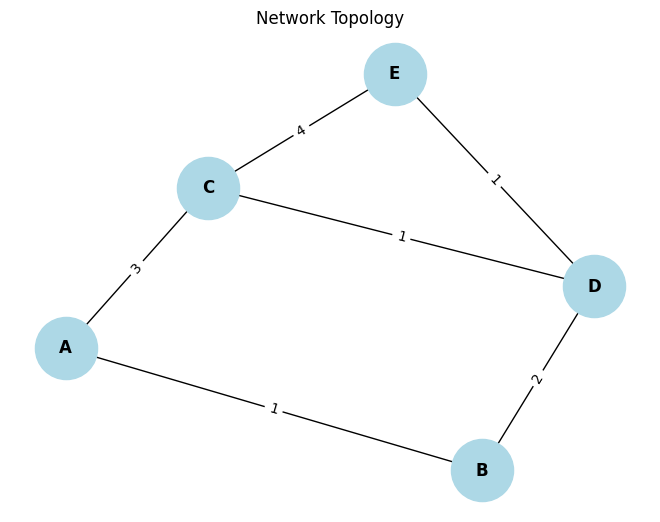

Routing table for Router A:
+---------------+------------+
| Destination   |   Distance |
+===============+============+
| B             |          1 |
+---------------+------------+
| C             |          3 |
+---------------+------------+
| D             |          3 |
+---------------+------------+
| E             |          4 |
+---------------+------------+

Routing table for Router B:
+---------------+------------+
| Destination   |   Distance |
+===============+============+
| A             |          1 |
+---------------+------------+
| C             |          3 |
+---------------+------------+
| D             |          2 |
+---------------+------------+
| E             |          3 |
+---------------+------------+

Routing table for Router C:
+---------------+------------+
| Destination   |   Distance |
+===============+============+
| A             |          3 |
+---------------+------------+
| B             |          3 |
+---------------+------------+
| D            

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

class Router:
    def __init__(self, name):
        self.name = name
        self.routing_table = {}

    def update_routing_table(self, destination, distance):
        self.routing_table[destination] = distance

def print_routing_tables(routers):
    for router in routers:
        table = [["Destination", "Distance"]]
        for destination, distance in router.routing_table.items():
            table.append([destination, distance])
        print(f"Routing table for Router {router.name}:")
        print(tabulate(table, headers="firstrow", tablefmt="grid"))
        print()

# Function to run Dijkstra's Algorithm
def dijkstra(graph, source):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[source] = 0
    visited = set()

    while len(visited) < len(graph.nodes()):
        current_node = min((node for node in graph.nodes() if node not in visited), key=lambda x: distances[x])
        visited.add(current_node)
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                distances[neighbor] = min(distances[neighbor], distances[current_node] + graph[current_node][neighbor]['weight'])

    return distances

# Define network graph
G = nx.Graph()
edges = [("A", "B", {'weight': 1}), ("A", "C", {'weight': 3}), ("B", "D", {'weight': 2}), ("C", "D", {'weight': 1}), ("C", "E", {'weight': 4}), ("D", "E", {'weight': 1})]
G.add_edges_from(edges)

# Create routers
routers = [Router(node) for node in G.nodes()]

# Run Dijkstra's Algorithm for each router
for i, router in enumerate(routers):
    distances = dijkstra(G, router.name)
    for destination, distance in distances.items():
        if destination != router.name:
            router.update_routing_table(destination, distance)

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.title('Network Topology')
plt.show()

# Print routing tables
print_routing_tables(routers)
